In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import Image

**Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/HI_HQ/Sonification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/HI_HQ/Sonification


**Plot HI spectrum**

  im.set_data(V[i],pf[i])

  im.set_data(V[i],pf[i])

  im.set_data(V[i],pf[i])



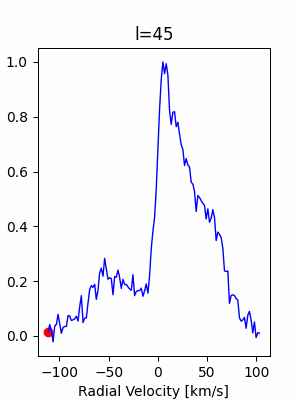

In [ ]:
# using loadtxt()
arr = np.loadtxt("20231019_vlsr_l45.csv",delimiter=",", dtype=str)
arr = arr[1:].astype(np.float32).T

vs=65
V= arr[0][::-1][vs:vs+128]
pf = arr[1][::-1][vs:vs+128]

# plt.plot(V,pf)

fig = plt.figure(figsize=(3, 4),)
ax = fig.add_subplot(1,1,1)

artists = []
im, = ax.plot([], [], 'ro')
ax.set_title('l=45')
ax.set_xlabel('Radial Velocity [km/s]')
ax.set_ylabel('Normalised Hydrogen Profile [a.u.]')

l = ax.plot(V,pf, linewidth = 1, color = 'b', linestyle = "-")

def update2(i):
    im.set_data(V[i],pf[i])
    return im,

anim = FuncAnimation(fig, update2, interval = 100, frames = np.arange(0, len(V), 2) , blit=True)
anim.save("l45_HI.gif", writer="pillow")
plt.close('all')
anim.save('l45.mp4', writer="ffmpeg",dpi=100, fps=6)
Image('l45_HI.gif', format='png')

**Creates Sounds**

In [ ]:
from IPython.display import Audio, display
framerate = 44100
time=0.043

arr_size = int(44100*time)
x=np.linspace(0,arr_size,arr_size)

Y=np.zeros(arr_size)
for i in range(len(V)):
    Hz1=960*331.5/(331.5+V[i])
    Hz2=770*331.5/(331.5+V[i])
    # print(Hz1,Hz2)
    pi_y=np.sin(2*np.pi*Hz1/44100*x)*pf[i]
    po_y=np.sin(2*np.pi*Hz2/44100*x)*pf[i]
    y=np.concatenate([pi_y,po_y])
    Y=np.concatenate([Y,y])

Y=Y[arr_size:]
write(filename= 'l45.mp3', rate=44100, data=Y)
Audio(Y,rate=framerate)

In [ ]:
import moviepy.editor as mp

video = mp.VideoFileClip("l45.mp4")
video = video.set_audio(mp.AudioFileClip("l45.mp3"))
video.write_videofile("l45_sound.mp4")

Moviepy - Building video l45_sound.mp4.
MoviePy - Writing audio in l45_soundTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video l45_sound.mp4



Moviepy - Done !
Moviepy - video ready l45_sound.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open("l45_sound.mp4", 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="25%" height="25%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")